# Titanic: Machine Learning from Disaster

## Competition Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Goal
It is your job to predict if a passenger survived the sinking of the Titanic or not. For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

### Metric
Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

## Submission File Format
You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:
+ PassengerId (sorted in any order)
+ Survived (contains your binary predictions: 1 for survived, 0 for deceased)

| PassengerId | Survived |
|---|---|
|892|0  |
|893|1  |
|894|0  |
|Etc.|

We start from loading some Python modules to manage data and aplying regression to our model

In [40]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

Reading the train file and saving it as a pandas data frame

In [41]:
train_df = pd.read_csv('./Data/train.csv')
test_df = pd.read_csv('./Data/test.csv')

Dimensions of the input data (number of rows and columns)

In [42]:
print ("Train dataframe shape is : ", train_df.shape)
print ("Test dataframe shape is : ", test_df.shape)

Train dataframe shape is :  (891, 12)
Test dataframe shape is :  (418, 11)


Columns name

In [43]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [44]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
# getting the summary statistics of the numerical columns #
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
# getting the datatypes of the individual columns #
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [48]:
# more information about the dataset #
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [49]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


So, there are 891 rows in train set and 418 rows in test set. Also as we can see, most of the columns are not null. There are few columns which have null values as well. They are:
 1. Age
 2. Cabin
 3. Embarked
 4. Cabin
 
Out of this, 'Cabin' variable is Null for most part of the rows. So it is better to remove the 'Cabin' variable for model building.

In [50]:
# dropping the cabin variable #
train_df.drop(['Cabin'], axis=1, inplace=True)
test_df.drop(['Cabin'], axis=1, inplace=True)

## Univariate Plots 

Now we will try to plot the given variables to see how they are distributed. 

Text(0.5,1,'Distribution of Survival, (1 = Survived)')

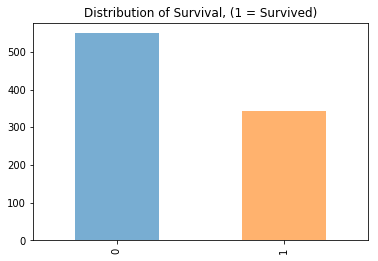

In [51]:
# let us get some plots to see the data #
train_df.Survived.value_counts().plot(kind='bar', alpha=0.6)
plt.title("Distribution of Survival, (1 = Survived)")

Text(0.5,1,'Age Distribution')

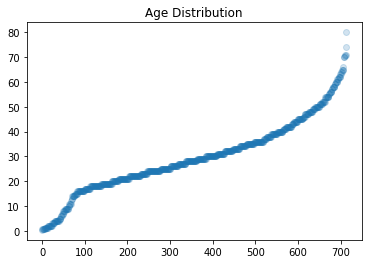

In [52]:
# scatter plot between survived and age #
plt.scatter(range(train_df.shape[0]), np.sort(train_df.Age), alpha=0.2)
plt.title("Age Distribution")

Text(0.5,1,'Class Distribution')

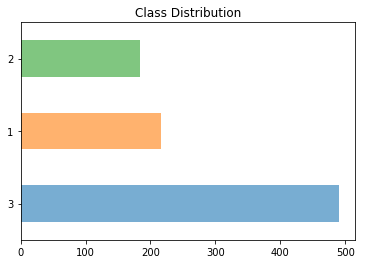

In [53]:
train_df.Pclass.value_counts().plot(kind="barh", alpha=0.6)
plt.title("Class Distribution")

##### TO DO:
1. Create a bar graph for the variable 'Embarked'.
2. Create a scatter plot for varibale 'fare' and check how it is distributed.

## Plots with DV
Now we will make plots with DV to understand the relationship of the variables with DV

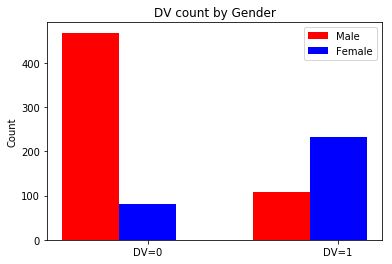

In [54]:
train_male = train_df.Survived[train_df.Sex == 'male'].value_counts().sort_index()
train_female = train_df.Survived[train_df.Sex == 'female'].value_counts().sort_index()

ind = np.arange(2)
width = 0.3
fig, ax = plt.subplots()
male = ax.bar(ind, np.array(train_male), width, color='r')
female = ax.bar(ind+width, np.array(train_female), width, color='b')
ax.set_ylabel('Count')
ax.set_title('DV count by Gender')
ax.set_xticks(ind + width)
ax.set_xticklabels(('DV=0', 'DV=1'))
ax.legend((male[0], female[0]), ('Male', 'Female'))
plt.show()

#### TO DO:
1. Plot a bar graph between DV and Pclass to see how the DV is distributed between the classes
2. Draw and "Box and Whisker plot" between DV and age and see the distribution between age and DV

## Supervised Machine Learning
### Logistic Regression

Our competition wants us to predict a binary outcome. That is, it wants to know whether some will die, (represented as a 0), or survive, (represented as 1).

Logistic Regression is a method to solve these kind of problems. Please read about logistic regression to have a deeper understanding.

In [55]:
# getting the necessary columns for building the model #
train_X = train_df[["Pclass", "SibSp", "Parch", "Fare"]]
train_y = train_df["Survived"]
test_X = test_df[["Pclass", "SibSp", "Parch", "Fare"]]

### Cross Validation

If we build models on the whole train dataset, how do we know the performance on the model on a new dataset?? 

So what we can instead do is to build the model on a part fo the dataset and then test it on the other part so that we get an idea of how our model performs on a new data. This process is known as Model Validation in Machine Learning field.

So now let us split the train data into two parts
1. Developement sample
2. Validation Sample

In [61]:
# split the train data into two samples #
dev_X, val_X, dev_y, val_y = train_test_split(train_X, train_y, test_size=0.33, random_state=42)

# Build the machine learning model - in this case, logistic regression #
# Initialize the model #
clf = lm.LogisticRegression()

# Build the model on development sample #
clf.fit(dev_X, dev_y)

# Predict on the validation sample #
val_preds = clf.predict(val_X)
print (val_preds[:10])

[0 0 0 0 0 1 0 0 0 1]


So we got the validation sample classes as prediction outputs. Now it is time to check the performance of our model. We have our validation sample predictions and we have the validation sample true labels with us. 

Let us compute the accuracy then.!

In [57]:
# import the function that computes the accuracy score #
from sklearn.metrics import accuracy_score

accuracy_score(val_y, val_preds)

0.7084745762711865

We can also compute other evaluation metrics like precision, recall etc.

We got the actual classes as outputs from our model. Instead if we need class probabilities, we can do the following

In [58]:
val_preds = clf.predict_proba(val_X)
val_preds[:10]

array([[0.72392064, 0.27607936],
       [0.61739343, 0.38260657],
       [0.74565568, 0.25434432],
       [0.52349124, 0.47650876],
       [0.7750273 , 0.2249727 ],
       [0.37396789, 0.62603211],
       [0.74585577, 0.25414423],
       [0.79859062, 0.20140938],
       [0.74585577, 0.25414423],
       [0.33274691, 0.66725309]])